In [90]:
import sqlalchemy
import pandas as pd

import mplfinance as mpf
from remy_workflow.patterns import patterns

import ipywidgets as widgets
import talib


In [91]:
db_connection_string = 'sqlite:///./Resources/products.db'
engine  = sqlalchemy.create_engine(db_connection_string)

inspector = sqlalchemy.inspect(engine)
table_names = inspector.get_table_names()
print(table_names)

['TSLA_1_Day_Candles', 'TSLA_1_Min_Candles', 'TSLA_Info']


In [92]:
# Update table names by looking at the list created above
# MSFT was used to create the example, replace it with the symbol you used
stock_ticker = 'TSLA'
daily_df = pd.read_sql_table(
    stock_ticker + '_1_Day_Candles', 
    con=engine, 
    index_col='Datetime',
    )
minutely_df = pd.read_sql_table(
    stock_ticker + '_1_Min_Candles', 
    con=engine, 
    index_col='Datetime'
    )

In [93]:
# print(daily_df.tail())

In [94]:
# print(minutely_df.tail())

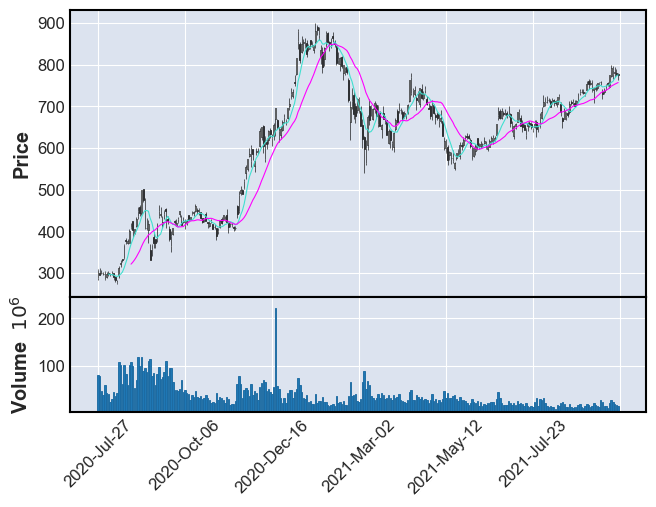

In [95]:
daily_slice = daily_df.iloc[-300:]
daily_candle_plot, ax = mpf.plot(
    # portfolio_list[0], 
    daily_slice, 
    type='candle', 
    volume=True, 
    returnfig=True,
    mav=(7,20),
    )


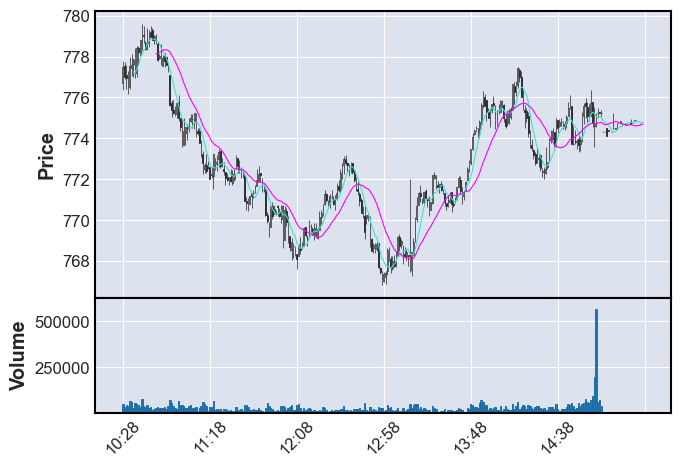

In [96]:
minutely_slice = minutely_df.iloc[-300:]
minutely_candle_plot, ax = mpf.plot(
    # portfolio_list[0], 
    minutely_slice, 
    type='candle', 
    volume=True, 
    returnfig=True,
    mav=(7,20),
    )


In [97]:
pattern_list = []
pattern_df = pd.DataFrame(list(patterns.items()), columns=['Index', 'Pattern'])
pattern_df = pattern_df.set_index('Index')
# print(pattern_df)
for pattern, p_name in patterns.items():
    pattern_list.append(pattern)

In [98]:
# vals = ['km', 'm', 'cm','mm']
sel = widgets.SelectMultiple(
        options=pattern_df['Pattern'],
        # options=pattern_list,
        # value=['m'],
        rows=min(25, len(pattern_list)),
        # column_stack=True,
        description='Unit:'
    )
display(sel)


SelectMultiple(description='Unit:', options=('Two Crows', 'Three Black Crows', 'Three Inside Up/Down', 'Three-…

In [99]:
df = daily_df
sel_pattern_list = list(pattern_df[pattern_df['Pattern'].isin(list(sel.value))].index)
for pattern in sel_pattern_list:
    pattern_function = getattr(talib, pattern)
    try:
        result = pattern_function(df['Open'], df['High'], df['Low'], df['Close'])
        df[pattern] = result
    except Exception as e:
        print(f"{type(e)} Exception! {e}")
print(df.head())

             Open   High    Low  Close    Volume
Datetime                                        
2010-06-29  3.800  5.000  3.508  4.778  93831500
2010-06-30  5.158  6.084  4.660  4.766  85935500
2010-07-01  5.000  5.184  4.054  4.392  41094000
2010-07-02  4.600  4.620  3.742  3.840  25699000
2010-07-06  4.000  4.000  3.166  3.222  34334500


In [100]:
df = minutely_df
sel_pattern_list = list(pattern_df[pattern_df['Pattern'].isin(list(sel.value))].index)
for pattern in sel_pattern_list:
    pattern_function = getattr(talib, pattern)
    try:
        result = pattern_function(df['Open'], df['High'], df['Low'], df['Close'])
        df[pattern] = result
    except Exception as e:
        print(f"{type(e)} Exception! {e}")
print(df.head())

                       Open    High     Low   Close  Volume
Datetime                                                   
2021-09-01 15:45:00  732.70  732.70  732.50  732.50    1462
2021-09-01 15:46:00  732.70  732.70  732.07  732.07     951
2021-09-01 15:48:00  732.45  732.45  732.45  732.45     204
2021-09-01 15:51:00  732.20  732.26  732.19  732.20    2820
2021-09-01 15:52:00  732.40  732.40  732.20  732.30    1549
